# Introduction

This is an Exploratory Data Analysis of a dataset (https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset) containing player characteristics and statistics in the Fifa 18 video game.

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

from itertools import product
import itertools
from collections import OrderedDict
import operator
import re
from math import sqrt
import pickle

# Data Preprocessing

In [2]:
original_df = pd.read_csv('CompleteDataset.csv', error_bad_lines=False, low_memory=False)

## Metadata

In [3]:
processed_df = original_df.copy()
processed_df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

# Data Preprocessing

Here we will take part in data cleaning: finding missing values, converting to desired data types, removing unwanted data etc.

In [5]:
# Drop the colums that cannot be used
processed_df = processed_df.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'ID'], 1)

In [6]:
# Convert the numerical values from string type to integer type. 
def str_to_int(string):
    try:
        integer = float(string)
        return integer
    except ValueError:
        return np.nan
    
processed_df['Acceleration'] = processed_df['Acceleration'].apply(str_to_int)
processed_df['Aggression'] = processed_df['Aggression'].apply(str_to_int)
processed_df['Agility'] = processed_df['Agility'].apply(str_to_int)
processed_df['Balance'] = processed_df['Balance'].apply(str_to_int)
processed_df['Ball control'] = processed_df['Ball control'].apply(str_to_int)
processed_df['Composure'] = processed_df['Composure'].apply(str_to_int)
processed_df['Crossing'] = processed_df['Crossing'].apply(str_to_int)
processed_df['Curve'] = processed_df['Curve'].apply(str_to_int)
processed_df['Dribbling'] = processed_df['Dribbling'].apply(str_to_int)
processed_df['Finishing'] = processed_df['Finishing'].apply(str_to_int)
processed_df['Free kick accuracy'] = processed_df['Free kick accuracy'].apply(str_to_int)
processed_df['GK diving'] = processed_df['GK diving'].apply(str_to_int)
processed_df['GK handling'] = processed_df['GK handling'].apply(str_to_int)
processed_df['GK kicking'] = processed_df['GK kicking'].apply(str_to_int)
processed_df['GK positioning'] = processed_df['GK positioning'].apply(str_to_int)
processed_df['GK reflexes'] = processed_df['GK reflexes'].apply(str_to_int)
processed_df['Heading accuracy'] = processed_df['Heading accuracy'].apply(str_to_int)
processed_df['Interceptions'] = processed_df['Interceptions'].apply(str_to_int)
processed_df['Jumping'] = processed_df['Jumping'].apply(str_to_int)
processed_df['Long passing'] = processed_df['Long passing'].apply(str_to_int)
processed_df['Long shots'] = processed_df['Long shots'].apply(str_to_int)
processed_df['Marking'] = processed_df['Marking'].apply(str_to_int)
processed_df['Penalties'] = processed_df['Penalties'].apply(str_to_int)
processed_df['Positioning'] = processed_df['Positioning'].apply(str_to_int)
processed_df['Reactions'] = processed_df['Reactions'].apply(str_to_int)
processed_df['Short passing'] = processed_df['Short passing'].apply(str_to_int)
processed_df['Shot power'] = processed_df['Shot power'].apply(str_to_int)
processed_df['Sliding tackle'] = processed_df['Sliding tackle'].apply(str_to_int)
processed_df['Sprint speed'] = processed_df['Sprint speed'].apply(str_to_int)
processed_df['Stamina'] = processed_df['Stamina'].apply(str_to_int)
processed_df['Standing tackle'] = processed_df['Standing tackle'].apply(str_to_int)
processed_df['Strength'] = processed_df['Strength'].apply(str_to_int)
processed_df['Vision'] = processed_df['Vision'].apply(str_to_int)
processed_df['Volleys'] = processed_df['Volleys'].apply(str_to_int)
processed_df['CAM'] = processed_df['CAM'].apply(str_to_int)
processed_df['CB'] = processed_df['CB'].apply(str_to_int)
processed_df['CDM'] = processed_df['CDM'].apply(str_to_int)
processed_df['CF'] = processed_df['CF'].apply(str_to_int)
processed_df['CM'] = processed_df['CM'].apply(str_to_int)
processed_df['LAM'] = processed_df['LAM'].apply(str_to_int)
processed_df['LB'] = processed_df['LB'].apply(str_to_int)
processed_df['LCM'] = processed_df['LCM'].apply(str_to_int)
processed_df['LDM'] = processed_df['LDM'].apply(str_to_int)
processed_df['LF'] = processed_df['LF'].apply(str_to_int)
processed_df['LM'] = processed_df['LM'].apply(str_to_int)
processed_df['LS'] = processed_df['LS'].apply(str_to_int)
processed_df['LW'] = processed_df['LW'].apply(str_to_int)
processed_df['LWB'] = processed_df['LWB'].apply(str_to_int)
processed_df['RAM'] = processed_df['RAM'].apply(str_to_int)
processed_df['RB'] = processed_df['RB'].apply(str_to_int)
processed_df['RCB'] = processed_df['RCB'].apply(str_to_int)
processed_df['RCM'] = processed_df['RCM'].apply(str_to_int)
processed_df['RDM'] = processed_df['RDM'].apply(str_to_int)
processed_df['RF'] = processed_df['RF'].apply(str_to_int)
processed_df['RM'] = processed_df['RM'].apply(str_to_int)
processed_df['RS'] = processed_df['RS'].apply(str_to_int)
processed_df['RW'] = processed_df['RW'].apply(str_to_int)
processed_df['RWB'] = processed_df['RWB'].apply(str_to_int)
processed_df['ST'] = processed_df['ST'].apply(str_to_int)

In [7]:
#Convert wages and values to floats
def str_to_float(string):
    if string[-1] == 'M':
        value = float(string[1:-1])*1000000
    elif string[-1] == 'K':
        value = float(string[1:-1])*1000
    else:
        value = float(string[1:])
    return value
        
processed_df['Value'] = processed_df['Value'].apply(str_to_float)
processed_df['Wage'] = processed_df['Wage'].apply(str_to_float)

# Exploratory Data Analysis

### Player Origins
Out of curiosity let's look at where most of the players come from.

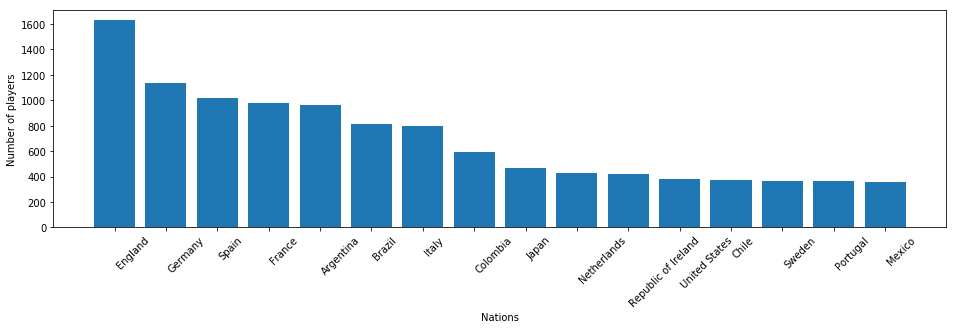

In [8]:
#Number of player per country
nations = {'Nation': 0}
def count_nations(nation):
    #Count the players per country
    if (nation in nations):
        nations[nation] = nations[nation] + 1
    else:
        nations[nation] = 1

processed_df['Nationality'].apply(count_nations)
nations.pop('Nation', None)
#Sort and take the top 10%
sorted_nations = OrderedDict(sorted(nations.items(), key=lambda x: x[1], reverse=True))
sorted_nations = dict((k, sorted_nations[k]) for k in list(sorted_nations.keys())[0:int(len(sorted_nations)/10)])

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_nations)), list(sorted_nations.values()))
plt.xticks(range(len(sorted_nations)), list(sorted_nations.keys()), rotation=45,  ha='left')
plt.xlabel('Nations')
plt.ylabel('Number of players')
plt.show()


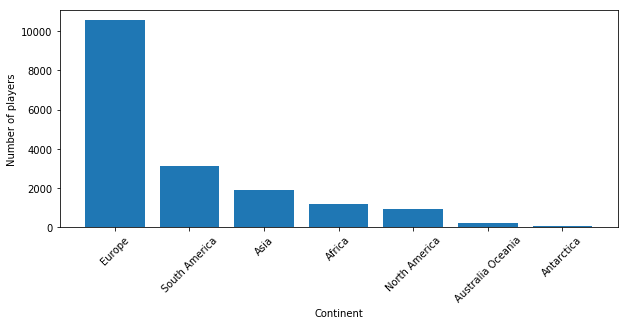

In [9]:
#Number of player per continent
continent_list = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}
continents = {'Africa' : 0, 'Antarctica' : 0,'Asia' : 0, 'Australia Oceania' : 0, 'Europe' : 0, 'North America' : 0, 'South America' : 0}

def count_continent(nation):
    #Count the players per continent
    for continent in continent_list:
        if nation in continent_list[continent]:
            continents[continent] = continents[continent] + 1
            return continent
    return np.NaN

processed_df['Nationality'].apply(count_continent)
sorted_continents = OrderedDict(sorted(continents.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_continents)), list(sorted_continents.values()))
plt.xticks(range(len(sorted_continents)), list(sorted_continents.keys()), rotation = 45)
plt.xlabel('Continent')
plt.ylabel('Number of players')
plt.show()

In the five biggest professional football leagues let's look at the proportion of foreign player.

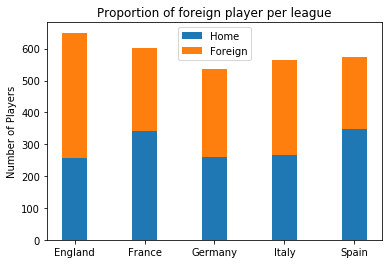

In [10]:
club_list_per_league = {
    'England' : ['Manchester United', 'Chelsea', 'Manchester City', 'Arsenal', 'Tottenham Hotspur', 'Liverpool', 'Leicester City', 'Southampton', 'Everton', 'Swansea City', 'Stoke City', 'West Ham United', 'Watford', 'Bournemouth', 'Crystal Palace', 'West Bromwich Albion', 'Burnley', 'Newcastle United', 'Brighton & Hove Albion', 'Huddersfield Town'],
    'France' : ['Paris Saint-Germain', 'AS Monaco', 'AS Saint-Étienne', 'Olympique de Marseille', 'Olympique Lyonnais', 'OGC Nice', 'Girondins de Bordeaux', 'Stade Rennais FC', 'Montpellier Hérault SC', 'FC Nantes', 'En Avant de Guingamp', 'Amiens SC Football', 'Dijon FCO', 'Angers SCO', 'LOSC Lille', 'RC Strasbourg', 'SM Caen', 'Toulouse FC', 'ES Troyes AC', 'FC Metz'],
    'Germany' : ['FC Bayern Munich', 'Borussia Dortmund', 'Bayer 04 Leverkusen', 'FC Schalke 04', 'RB Leipzig', 'Borussia Mönchengladbach', 'TSG 1899 Hoffenheim', 'SV Werder Bremen', 'VfL Wolfsburg', 'Hertha BSC Berlin', 'Eintracht Frankfurt', 'VfB Stuttgart', 'Eintracht Braunschweig', 'FC Augsburg', '1. FSV Mainz 05', 'Hamburger SV', 'Hannover 96', 'SC Freiburg'],
    'Italy' : ['Juventus', 'Milan', 'Napoli', 'Inter', 'Roma', 'Torino', 'Lazio', 'Genoa', 'Sassuolo', 'Sampdoria', 'Fiorentina', 'Atalanta', 'Sampdoria', 'Bologna', 'Chievo Verona', 'Udinese', 'Cagliari', 'Ferrara (SPAL)', 'Crotone', 'Hellas Verona', 'Benevento Calcio'],
    'Spain' : ['Real Madrid CF', 'FC Barcelona', 'Atletico Madrid', 'Athletic Club de Bilbao','1. FC Köln', 'Villarreal CF', 'Real Sociedad', 'UD Las Palmas', 'RC Celta de Vigo', 'RCD Espanyol', 'SD Eibar', 'Valencia CF', 'Sevilla FC', 'RC Deportivo de La Coruña', 'Real Betis Balompié', 'Getafe CF', 'Girona CF', 'Deportivo Alav√©s', 'Levante UD', 'Deportivo Alavés', 'Málaga CF'],
}

two_columns = processed_df[['Nationality', 'Club']]

nationality_proportion = {'England' : [0, 0], 'France' : [0, 0], 'Germany' : [0, 0], 'Italy' : [0, 0], 'Spain' : [0, 0]}
def count_foreign_players():
    index = 0
    while (index < len(two_columns)):
        for country in club_list_per_league:
            if two_columns['Club'][index] in club_list_per_league[country]:
                if two_columns['Nationality'][index] == country:
                    nationality_proportion[country][0] = nationality_proportion[country][0] + 1
                else:
                    nationality_proportion[country][1] = nationality_proportion[country][1] + 1
        index += 1

count_foreign_players()
N = 5
home = (nationality_proportion['England'][0], nationality_proportion['France'][0], nationality_proportion['Germany'][0], nationality_proportion['Italy'][0], nationality_proportion['Spain'][0])
foreign = (nationality_proportion['England'][1], nationality_proportion['France'][1], nationality_proportion['Germany'][1], nationality_proportion['Italy'][1], nationality_proportion['Spain'][1])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
p1 = ax.bar(ind, home, width)
p2 = ax.bar(ind, foreign, width, bottom = home)
plt.ylabel('Number of Players')
plt.title('Proportion of foreign player per league')
plt.xticks(ind, ('England', 'France', 'Germany', 'Italy', 'Spain'))
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Home', 'Foreign'))
plt.show()

Interestingly even though Europe has the most players, their notorious leagues have many international players.

### Player Values

Let us take a look at player transfer value and salary based on his characteristics.

In [11]:
# Maximum player value per country
# Selecting players with age smaller then 40 
dataset = processed_df.loc[processed_df['Age'] <= 40]
country_value = dataset.groupby("Nationality")["Value"].max()
country_value = country_value.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_value['Nationality'],
        z = country_value['Value'],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Maximum<br>Player Value'),
      ) ]

layout = dict(
    title = 'Maximum Player Value Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False )

In [12]:
#Maximim player wage per country
country_wage = dataset.groupby("Nationality")["Wage"].max()
country_wage = country_wage.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_wage['Nationality'],
        z = country_wage['Wage'],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Maximum<br>Player Value'),
      ) ]

layout = dict(
    title = 'Maximum Player Wage Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False )

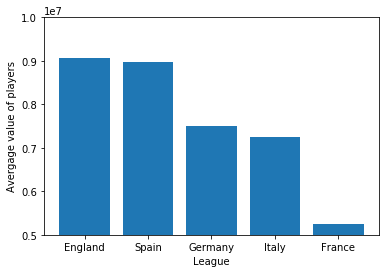

In [13]:
#Player value per league 
value_per_league = {'League': 0}
league_value = {'England' : 0, 'France' : 0, 'Germany' : 0, 'Italy' : 0, 'Spain' : 0}

def sum_values(series):
    value = series[1]

    #Count the players value per league
    for league in club_list_per_league:
        if series[0] in club_list_per_league[league]:
            league_value[league] += value
            return league
    return np.NaN

club_value = processed_df[['Club', 'Value']]
club_value.apply(sum_values, 1)
value_per_league.pop('League', None)

#Average the players value per league
for league in league_value:
    league_value[league] = league_value[league] / (float(nationality_proportion[league][0])+float(nationality_proportion[league][1]))

sorted_league_value = OrderedDict(sorted(league_value.items(), key=lambda x: x[1], reverse=True))

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(sorted_league_value)), list(sorted_league_value.values()))
plt.xticks(range(len(sorted_league_value)), list(sorted_league_value.keys()))
plt.xlabel('League')
plt.ylabel('Avergage value of players')
ax.set(ylim=(0.5e7, 1e7))
plt.show()

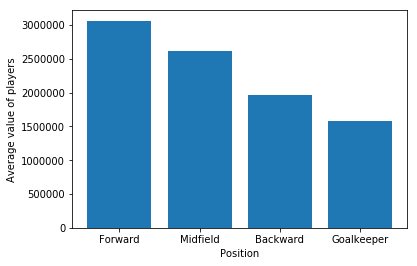

In [14]:
#Player value per position
position_list = {
    'Forward' : ['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'],
    'Midfield' : ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCB', 'RCM', 'RDM', 'RM'],
    'Backward' : ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'],
    'Goalkeeper' : ['GK'],
}
sum_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
player_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
average_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}

def sum_values(series):
    already_counted = [0, 0, 0, 0] #Array to avoid having repeated values in the average
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    value = series[1]

    #Count the players per position category
    index = 0
    for preferred_position in preferred_position_list:
        for position in position_list:
            if preferred_position in position_list[position]:
                if(not already_counted[index]):
                    sum_per_position[position] += value
                    player_per_position[position] += 1                    
                    already_counted[index] = 1
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

#Average the players value per position category
for position in sum_per_position:
    average_per_position[position] = sum_per_position[position] / player_per_position[position]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average_per_position)), list(average_per_position.values()))
plt.xticks(range(len(average_per_position)), list(average_per_position.keys()))
plt.xlabel('Position')
plt.ylabel('Average value of players')
plt.show()

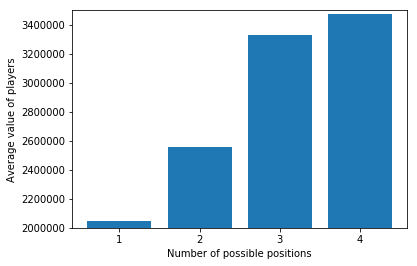

In [15]:
#Versatility and value
skill_versatility = {1: [0, 0], 2: [0, 0], 3: [0, 0], 4: [0, 0]}
average = {1: 0, 2: 0, 3: 0, 4: 0}

def sum_values(series):
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split() #Split the preferred positions
    skill_count = len(preferred_position_list)
    value = series[1]

    #Count the players per versatility
    if (skill_count in skill_versatility):
        skill_versatility[skill_count][0] += 1
        skill_versatility[skill_count][1] += value  
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

#Average the players value per position count
for count in skill_versatility:
    average[count] = skill_versatility[count][1] / skill_versatility[count][0]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average)), list(average.values()))
plt.xticks(range(len(average)), list(average.keys()))
plt.xlabel('Number of possible positions')
plt.ylabel('Average value of players')
ax.set(ylim=(2000000, 3500000))
plt.show()

<Figure size 432x288 with 0 Axes>

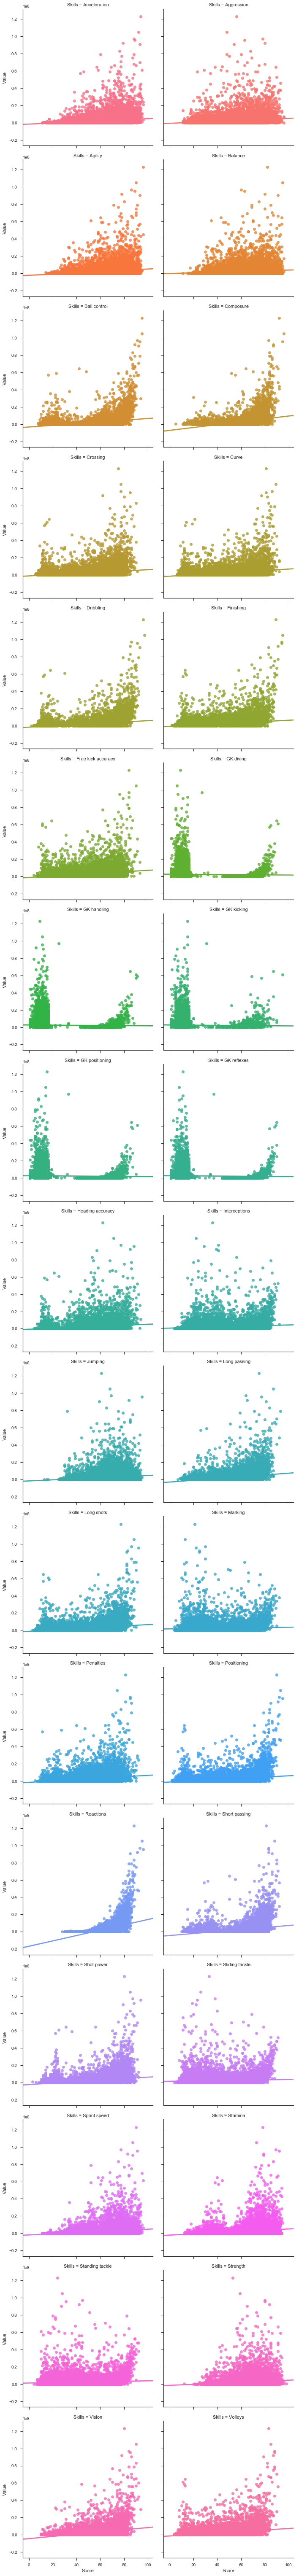

In [16]:
#Player value per skill
fig = plt.figure(figsize=(6,4))
sns.set(style="ticks")
test = pd.DataFrame(np.c_[processed_df['Value'], processed_df['Acceleration'], processed_df['Aggression'], processed_df['Agility'], processed_df['Balance'],
                          processed_df['Ball control'], processed_df['Composure'],processed_df["Crossing"],processed_df['Curve'], processed_df['Dribbling'],
                          processed_df['Finishing'], processed_df['Free kick accuracy'], processed_df['GK diving'], processed_df['GK handling'], processed_df['GK kicking'],
                          processed_df['GK positioning'], processed_df['GK reflexes'], processed_df['Heading accuracy'], processed_df['Interceptions'], processed_df['Jumping'],
                          processed_df['Long passing'], processed_df['Long shots'], processed_df['Marking'], processed_df['Penalties'], processed_df['Positioning'],
                          processed_df['Reactions'], processed_df['Short passing'], processed_df['Shot power'], processed_df['Sliding tackle'], processed_df['Sprint speed'], 
                          processed_df['Stamina'], processed_df['Standing tackle'], processed_df['Strength'], processed_df['Vision'], processed_df['Volleys'] ], 
                    columns=["Value", "Acceleration", "Aggression", "Agility", "Balance", "Ball control", "Composure", "Crossing", "Curve", "Dribbling", "Finishing", "Free kick accuracy", "GK diving",
                             "GK handling", "GK kicking", "GK positioning", "GK reflexes", "Heading accuracy", "Interceptions", "Jumping", "Long passing", "Long shots", "Marking", "Penalties", "Positioning",
                             "Reactions", "Short passing", "Shot power", "Sliding tackle", "Sprint speed", "Stamina", "Standing tackle", "Strength", "Vision","Volleys"])
test = test.melt('Value', var_name='Skills',  value_name='Score')
g = sns.lmplot(y="Value", x="Score", hue='Skills', col="Skills", data=test, col_wrap=2)
plt.show()

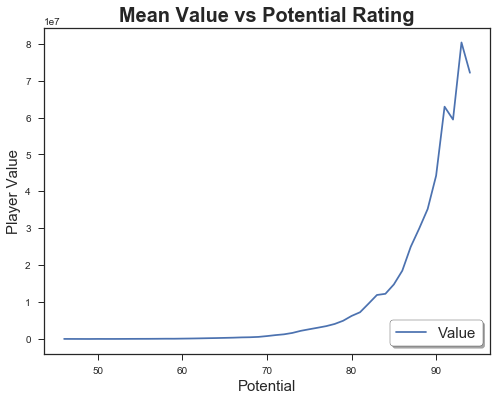

In [17]:
#Potential and Value
# Selecting unique Age from DataFrame
potential = dataset.sort_values("Potential")['Potential'].unique()
# Selecting mean Overall from DataFrame
overall = dataset.sort_values("Overall")['Overall'].unique()
# Selecting mean value from DataFrame
value = dataset.groupby("Potential")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Potential', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(potential, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

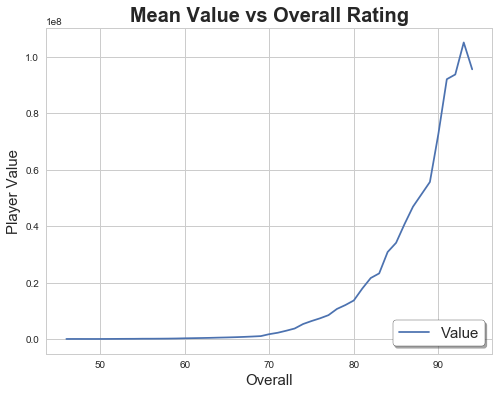

In [18]:
#Overall and Value
# Selecting unique Age from DataFrame
overall = dataset.sort_values("Overall")['Overall'].unique()
# Selecting mean Overall from DataFrame
value = dataset.groupby("Overall")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Overall Rating', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

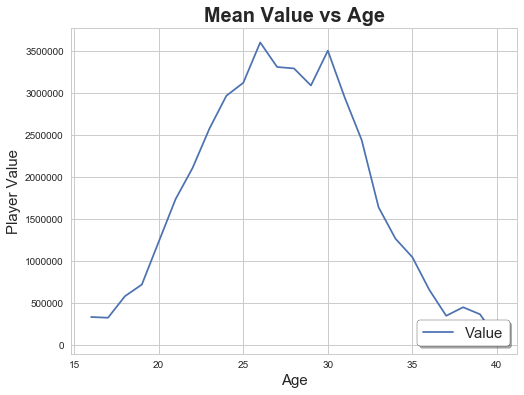

In [19]:
#Age and value
# Selecting unique Age from DataFrame
age = dataset.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
value = dataset.groupby("Age")["Value"].mean().values

plt.figure(figsize=(8,6))
plt.title('Mean Value vs Age', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Player Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, value, label="Value")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

Interestingly, players with more offensive playstyles are more expensive than defensive ones. Even though both positions are equally important, which shows a bias on the transfer market (maybe because they have better marketting value for advertisements, jersey sales which unfortunately is not contained in the dataset).<br/>
Versatility is also a valueable asset because it enables a coach to have more freedom for team management.<br/>
Obviously the better a player's overall rating the greater his transfer value. But less obviously, players with high potential values are very expenssive too because teams see them as an investment.

### Player Overall and Potential Rating

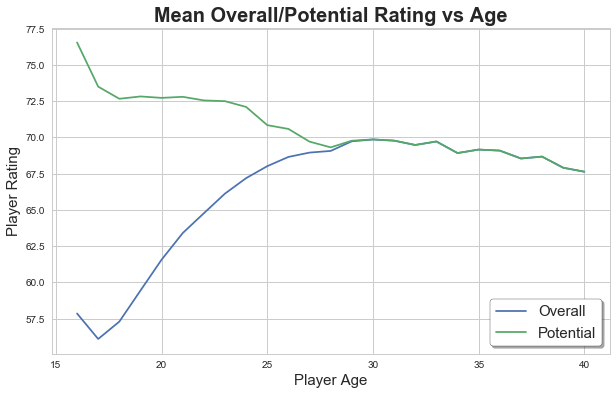

In [20]:
#Age and quality
#Age and potential
# Selecting players with age smaller then 40 
dataset = processed_df.loc[processed_df['Age'] <= 40]
# Selecting unique Age from DataFrame
age = dataset.sort_values("Age")['Age'].unique()
# Selecting mean Overall from DataFrame
overall = dataset.groupby("Age")["Overall"].mean().values
# Selecting mean Potential from DataFrame
potential = dataset.groupby("Age")["Potential"].mean().values

plt.figure(figsize=(10,6))
plt.title('Mean Overall/Potential Rating vs Age', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Rating', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, overall, label="Overall")
plt.plot(age, potential, label="Potential")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [21]:
#Maximum player overall score per country
country_overall = dataset.groupby("Nationality")["Overall"].max()
country_overall = country_overall.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_overall['Nationality'],
        z = country_overall['Overall'],
        colorscale = [[55,"rgb(5, 10, 172)"],[59,"rgb(40, 60, 190)"],[63,"rgb(70, 100, 245)"],\
            [67,"rgb(90, 120, 245)"],[71,"rgb(106, 137, 247)"],[75,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Maximum<br>Overall Score'),
      ) ]

layout = dict(
    title = 'Player Quality',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False )

In [22]:
#Maximum player potential score per country
country_potential = dataset.groupby("Nationality")["Potential"].max()
country_potential = country_potential.reset_index()

data = [ dict(
        type = 'choropleth',
        locationmode = "country names",
        locations = country_potential['Nationality'],
        z = country_potential['Potential'],
        colorscale = [[65,"rgb(5, 10, 172)"],[67,"rgb(40, 60, 190)"],[69,"rgb(70, 100, 245)"],\
            [71,"rgb(90, 120, 245)"],[73,"rgb(106, 137, 247)"],[75,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Maximum<br>Potential Score'),
      ) ]

layout = dict(
    title = 'Player Potential',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False )

The main football hubs seem to be South America and Western Europe.

### Clubs

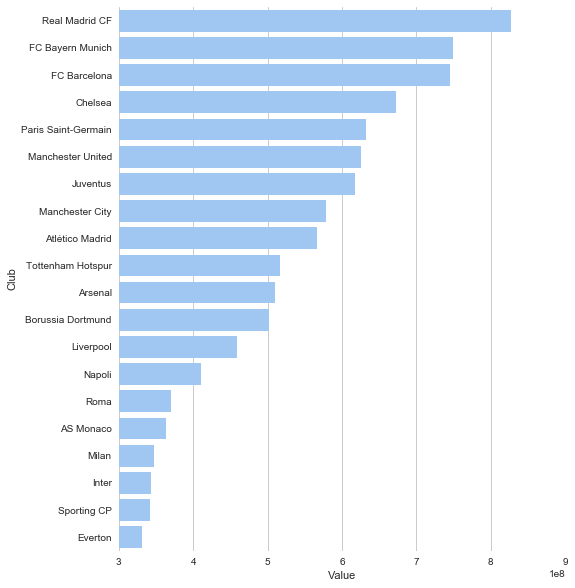

In [23]:
#Team value
club_value = dataset.groupby("Club")["Value"].sum()
club_value = club_value.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=club_value.nlargest(20, "Value")["Club"], x=club_value.nlargest(20, "Value")["Value"], data=club_value,
            label="Total", color="b")
ax.set(xlim=(3e8, 9e8))

sns.despine(left=True, bottom=True)

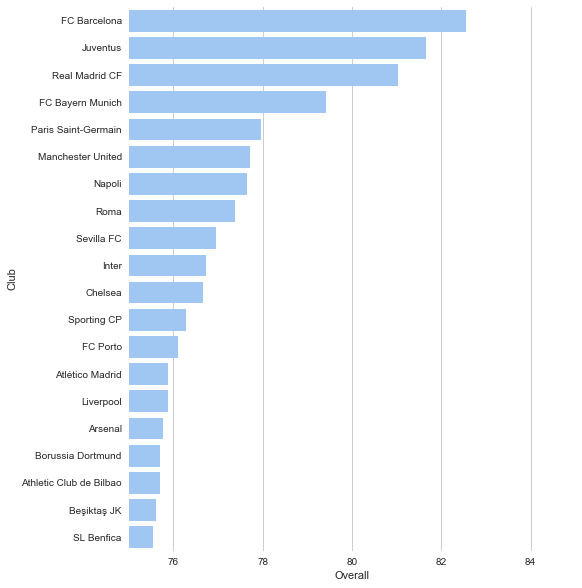

In [24]:
#Team quality
club_overall = dataset.groupby("Club")["Overall"].mean()
club_overall = club_overall.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=club_overall.nlargest(20, "Overall")["Club"], x=club_overall.nlargest(20, "Overall")["Overall"], data=club_overall,
            label="Total", color="b")
ax.set(xlim=(75, 85))
sns.despine(left=True, bottom=True)

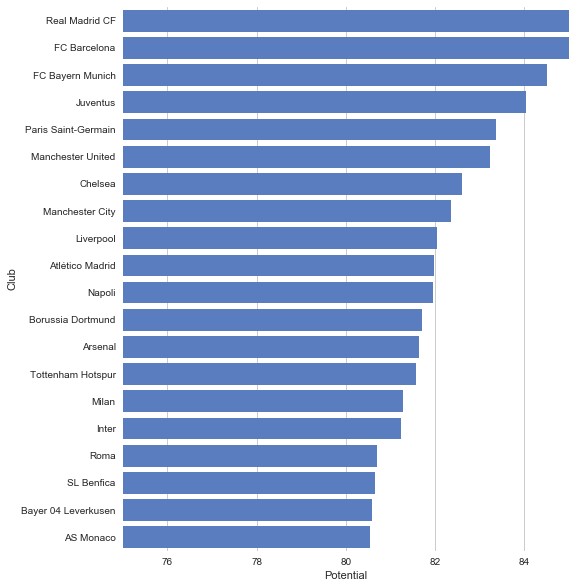

In [25]:
#Team potential
club_potential = dataset.groupby("Club")["Potential"].mean()
club_potential = club_potential.reset_index()

sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y=club_potential.nlargest(20, "Potential")["Club"], x=club_potential.nlargest(20, "Potential")["Potential"], data=club_potential,
            label="Total", color="b")
ax.set(xlim=(75, 85))
sns.despine(left=True, bottom=True)

### Heatmaps
Let us look at the correlation between certain features.

<Figure size 936x936 with 0 Axes>

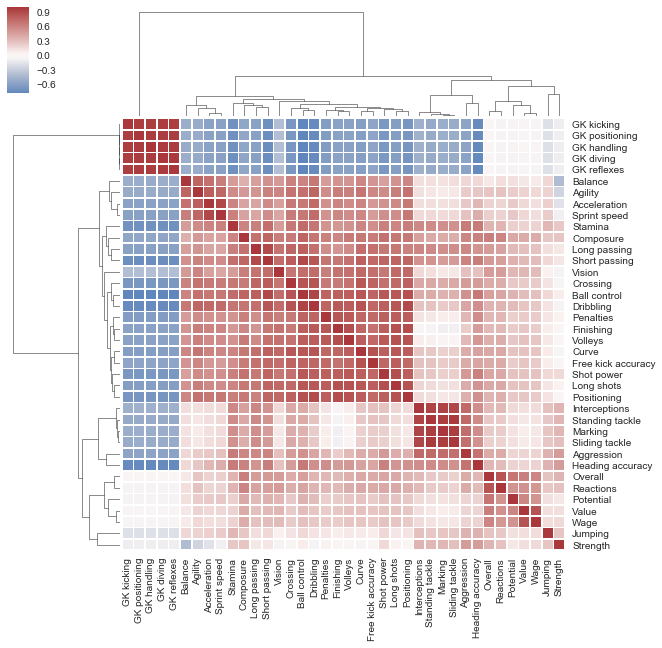

In [26]:
#Heatmap: show the correlation between similar features.
# Select a subset of the df
used_variables = ['Overall', 'Potential',
       'Value', 'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']
used_columns = (processed_df.columns.get_level_values(None).isin(used_variables))
df = processed_df.loc[:, used_columns]

# Draw the full plot
plt.figure(figsize=(13,13))
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=.75)


<Figure size 936x936 with 0 Axes>

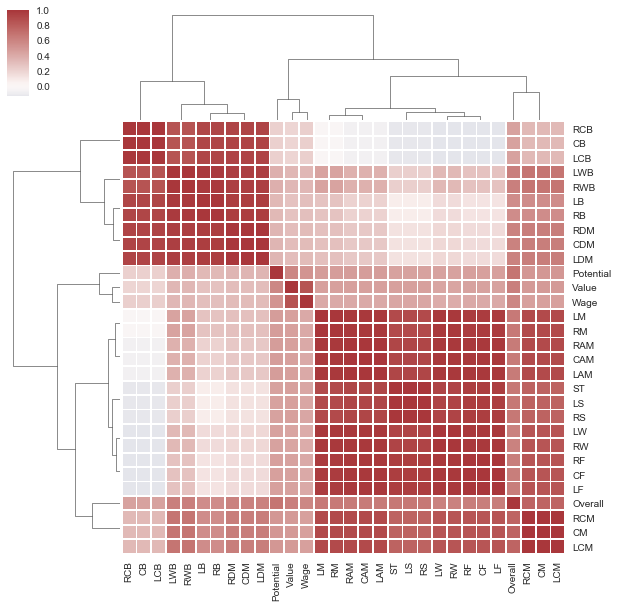

In [27]:
#Heatmap
# Select a subset of the df
used_variables = ['Overall', 'Potential', 'Value', 'Wage', 'CAM',
                  'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM',
                  'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB','RAM', 'RB',
                  'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST']
used_columns = (processed_df.columns.get_level_values(None).isin(used_variables))
df = processed_df.loc[:, used_columns]

# Draw the full plot
plt.figure(figsize=(13,13))
sns.clustermap(df.corr(), center=0, cmap="vlag", linewidths=.75)

# Modeling
Now let us make a machine learning model to predict player transfer value and wage based on his characteristics
## Transfer Value 
Following our EDA, we saw that the nationality and club had little consequence over the player's value, and adding them to the model would add a lot of dimensions, so we can safely drop them.

In [28]:
preprocessed_df = processed_df.copy()
preprocessed_df = preprocessed_df.drop(['Name', 'Nationality', 'Club'], 1)
preprocessed_df = preprocessed_df.drop(preprocessed_df.columns[0], 1)
#Separate x and y
y_value = preprocessed_df['Value'].copy()
y_wage = preprocessed_df['Wage'].copy()
preprocessed_df = preprocessed_df.drop(['Value', 'Wage'], 1)

As we have seen in the EDA, a player's versatility is valuable so we need to capture that in the model.

In [29]:
#Manually one hot encode Preferred Positions
#Take all the possible positions
all_pos = set(sum([x.strip().split(" ") for x in list(set(preprocessed_df['Preferred Positions']))], []))

preferred_position = preprocessed_df['Preferred Positions']
#For each possible position
for p in all_pos:
    #Create a new series indicating whether the player plays that position
    s = pd.Series()
    #Go through the Preferred Position column
    for player in preferred_position:
        #Mark the column as 1 if the player can play the position and 0 else
        preferred_position_list = re.sub("[^\w]", " ",  player).split() #Split the preferred positions
        if(p in preferred_position_list):
            s1 = pd.Series([1])
            s = s.append(s1, ignore_index=True)
        else:
            s1 = pd.Series([0])
            s = s.append(s1, ignore_index=True)
    preprocessed_df["preferred_" + p] = s


In [30]:
# Add versatility to the model
def count_positions(position):
    return len(re.sub("[^\w]", " ",  position).split()) #Split the preferred positions

preprocessed_df['Versatility'] = preprocessed_df['Preferred Positions'].apply(count_positions)
preprocessed_df.head()

,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,...,preferred_LB,preferred_LW,preferred_CF,preferred_CB,preferred_RB,preferred_CAM,preferred_LM,preferred_ST,preferred_LWB,Versatility
0,32,94,94,89.0,63.0,89.0,63.0,93.0,95.0,85.0,...,0,1,0,0,0,0,0,1,0,2
1,30,93,93,92.0,48.0,90.0,95.0,95.0,96.0,77.0,...,0,0,0,0,0,0,0,0,0,1
2,25,92,94,94.0,56.0,96.0,82.0,95.0,92.0,75.0,...,0,1,0,0,0,0,0,0,0,1
3,30,92,92,88.0,78.0,86.0,60.0,91.0,83.0,77.0,...,0,0,0,0,0,0,0,1,0,1
4,31,92,92,58.0,29.0,52.0,35.0,48.0,70.0,15.0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#Remove the initial one hot encoded column and remove space in columns to enable graphviz tree plotting
preprocessed_df = preprocessed_df.drop(['Preferred Positions'], 1)
preprocessed_df.columns = preprocessed_df.columns.str.replace('\s+', '_')

In [32]:
#Train-Test split
X_train_value, X_test_value, y_train_value, y_test_value = train_test_split(preprocessed_df, y_value, test_size=0.2)
X_train_wage, X_test_wage, y_train_wage, y_test_wage = train_test_split(preprocessed_df, y_wage, test_size=0.2)

In [33]:
#Create permutations of different hyperparameter combinations
num_boost_round = 999
early_stopping_rounds = 10

xgb_params = {
                'n_estimators':[500],
                # Other parameters
                'objective':['reg:linear'],
                'eval_metric':[ ["rmse" ,"mae"]],
                'min_child_weight': [1],
                'eta': [0.01, 0.1], #Learning rate
                'gamma': [0.05, 0.1], #Minimum acceptable entropy improvement to perform a split
                #Bias\variance tradeoff knobs
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0],
                'max_depth': [6, 9]
              }

params_perms = [dict(zip(xgb_params, v)) for v in product(*xgb_params.values())]
print(len(params_perms))
print(params_perms[0])

32
{'n_estimators': 500, 'objective': 'reg:linear', 'eval_metric': ['rmse', 'mae'], 'min_child_weight': 1, 'eta': 0.01, 'gamma': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'max_depth': 6}


In [34]:
dtrain_value = xgb.DMatrix(X_train_value, label=y_train_value)
dtest_value = xgb.DMatrix(X_test_value, label=y_test_value)
evaluation_set_value = [(dtest_value, "Test_set")]

### Create Baseline Model for Comparison (Average)

In [35]:
mean_train_value = np.mean(y_train_value)

# Get predictions on the test set
baseline_predictions_value = np.ones(y_test_value.shape) * mean_train_value

# Compute MAE
mae_baseline_value = mean_absolute_error(y_test_value, baseline_predictions_value)

# Compute RMSE
rmse_baseline_value = sqrt(mean_squared_error(y_test_value, baseline_predictions_value))

print("Baseline MAE is {:.2f}".format(mae_baseline_value))
print("Baseline RMSE is {:.2f}".format(rmse_baseline_value))

Baseline MAE is 2801870.40
Baseline RMSE is 5920758.63


### Grid Search for Best Parameters

In [36]:
best_score_value = mae_baseline_value
best_params_value = {}
for i, grid_search_value in enumerate(params_perms):
    print("Permutation number:", i+1)
    cv_results_value = xgb.cv(grid_search_value,
                        dtrain_value,
                        num_boost_round=num_boost_round,
                        seed=42,
                        nfold=2,
                        metrics={'mae'},
                        early_stopping_rounds=early_stopping_rounds
                        )
    
    mean_mae_value = cv_results_value['test-mae-mean'].min()
    boost_rounds_value = cv_results_value['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae_value, boost_rounds_value))
    if mean_mae_value < best_score_value:
        best_score_value = mean_mae_value
        best_params_value = grid_search_value

Permutation number: 1


/Users/paulfournier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning:

'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.



	MAE 175185.2109375 for 998 rounds
Permutation number: 2
	MAE 170802.90625 for 998 rounds
Permutation number: 3
	MAE 162190.84375 for 994 rounds
Permutation number: 4
	MAE 155993.5078125 for 998 rounds
Permutation number: 5
	MAE 182658.7890625 for 998 rounds
Permutation number: 6
	MAE 180249.96875 for 998 rounds
Permutation number: 7
	MAE 172200.390625 for 985 rounds
Permutation number: 8
	MAE 164967.3984375 for 998 rounds
Permutation number: 9
	MAE 175185.2109375 for 998 rounds
Permutation number: 10
	MAE 170802.90625 for 998 rounds
Permutation number: 11
	MAE 162190.84375 for 994 rounds
Permutation number: 12
	MAE 155993.5078125 for 998 rounds
Permutation number: 13
	MAE 182658.7890625 for 998 rounds
Permutation number: 14
	MAE 180249.96875 for 998 rounds
Permutation number: 15
	MAE 172200.390625 for 985 rounds
Permutation number: 16
	MAE 164967.3984375 for 998 rounds
Permutation number: 17
	MAE 178392.7265625 for 401 rounds
Permutation number: 18
	MAE 182463.484375 for 190 rounds
Pe

In [37]:
print("Best Score:", best_score_value)
print("Best Parameters:", best_params_value)

Best Score: 155993.5078125
Best Parameters: {'n_estimators': 500, 'objective': 'reg:linear', 'eval_metric': ['rmse', 'mae'], 'min_child_weight': 1, 'eta': 0.01, 'gamma': 0.05, 'subsample': 0.8, 'colsample_bytree': 1.0, 'max_depth': 9}


### Retrain the Model with the Best Parameters

In [38]:
#Retrain a model with new best params
model_value = xgb.train(
    best_params_value,
    dtrain_value,
    num_boost_round=num_boost_round,
    evals=evaluation_set_value,
    early_stopping_rounds=early_stopping_rounds
)

[0]	Test_set-rmse:6.36804e+06	Test_set-mae:2.47179e+06
Multiple eval metrics have been passed: 'Test_set-mae' will be used for early stopping.

Will train until Test_set-mae hasn't improved in 10 rounds.
[1]	Test_set-rmse:6.31883e+06	Test_set-mae:2.44899e+06
[2]	Test_set-rmse:6.26421e+06	Test_set-mae:2.42589e+06
[3]	Test_set-rmse:6.21413e+06	Test_set-mae:2.4035e+06
[4]	Test_set-rmse:6.16117e+06	Test_set-mae:2.38094e+06
[5]	Test_set-rmse:6.11032e+06	Test_set-mae:2.35869e+06
[6]	Test_set-rmse:6.05812e+06	Test_set-mae:2.33648e+06
[7]	Test_set-rmse:6.00788e+06	Test_set-mae:2.31452e+06
[8]	Test_set-rmse:5.95673e+06	Test_set-mae:2.29286e+06
[9]	Test_set-rmse:5.9071e+06	Test_set-mae:2.2715e+06
[10]	Test_set-rmse:5.85747e+06	Test_set-mae:2.25023e+06
[11]	Test_set-rmse:5.80763e+06	Test_set-mae:2.22911e+06
[12]	Test_set-rmse:5.75842e+06	Test_set-mae:2.20813e+06
[13]	Test_set-rmse:5.71068e+06	Test_set-mae:2.18771e+06
[14]	Test_set-rmse:5.66248e+06	Test_set-mae:2.1672e+06
[15]	Test_set-rmse:5.6152

[148]	Test_set-rmse:2.16157e+06	Test_set-mae:651382
[149]	Test_set-rmse:2.15085e+06	Test_set-mae:645984
[150]	Test_set-rmse:2.1386e+06	Test_set-mae:640522
[151]	Test_set-rmse:2.1265e+06	Test_set-mae:635214
[152]	Test_set-rmse:2.11557e+06	Test_set-mae:630025
[153]	Test_set-rmse:2.10396e+06	Test_set-mae:624842
[154]	Test_set-rmse:2.09353e+06	Test_set-mae:619844
[155]	Test_set-rmse:2.08184e+06	Test_set-mae:614788
[156]	Test_set-rmse:2.06954e+06	Test_set-mae:609756
[157]	Test_set-rmse:2.05659e+06	Test_set-mae:604631
[158]	Test_set-rmse:2.04571e+06	Test_set-mae:599729
[159]	Test_set-rmse:2.03447e+06	Test_set-mae:594903
[160]	Test_set-rmse:2.02284e+06	Test_set-mae:590088
[161]	Test_set-rmse:2.01233e+06	Test_set-mae:585345
[162]	Test_set-rmse:2.00118e+06	Test_set-mae:580581
[163]	Test_set-rmse:1.98901e+06	Test_set-mae:575665
[164]	Test_set-rmse:1.97814e+06	Test_set-mae:571050
[165]	Test_set-rmse:1.96708e+06	Test_set-mae:566358
[166]	Test_set-rmse:1.9562e+06	Test_set-mae:561725
[167]	Test_set-

[307]	Test_set-rmse:1.14616e+06	Test_set-mae:223469
[308]	Test_set-rmse:1.14285e+06	Test_set-mae:222434
[309]	Test_set-rmse:1.1397e+06	Test_set-mae:221471
[310]	Test_set-rmse:1.13661e+06	Test_set-mae:220448
[311]	Test_set-rmse:1.13333e+06	Test_set-mae:219460
[312]	Test_set-rmse:1.13013e+06	Test_set-mae:218493
[313]	Test_set-rmse:1.12699e+06	Test_set-mae:217506
[314]	Test_set-rmse:1.12409e+06	Test_set-mae:216564
[315]	Test_set-rmse:1.12112e+06	Test_set-mae:215613
[316]	Test_set-rmse:1.11865e+06	Test_set-mae:214683
[317]	Test_set-rmse:1.11581e+06	Test_set-mae:213769
[318]	Test_set-rmse:1.11352e+06	Test_set-mae:212944
[319]	Test_set-rmse:1.11077e+06	Test_set-mae:212087
[320]	Test_set-rmse:1.10799e+06	Test_set-mae:211206
[321]	Test_set-rmse:1.10535e+06	Test_set-mae:210341
[322]	Test_set-rmse:1.10262e+06	Test_set-mae:209488
[323]	Test_set-rmse:1.10116e+06	Test_set-mae:208690
[324]	Test_set-rmse:1.09816e+06	Test_set-mae:207820
[325]	Test_set-rmse:1.09589e+06	Test_set-mae:206972
[326]	Test_se

[475]	Test_set-rmse:886725	Test_set-mae:152936
[476]	Test_set-rmse:885766	Test_set-mae:152805
[477]	Test_set-rmse:884824	Test_set-mae:152677
[478]	Test_set-rmse:883864	Test_set-mae:152544
[479]	Test_set-rmse:883144	Test_set-mae:152415
[480]	Test_set-rmse:882404	Test_set-mae:152278
[481]	Test_set-rmse:881684	Test_set-mae:152158
[482]	Test_set-rmse:881010	Test_set-mae:152047
[483]	Test_set-rmse:880820	Test_set-mae:151960
[484]	Test_set-rmse:880544	Test_set-mae:151882
[485]	Test_set-rmse:879862	Test_set-mae:151750
[486]	Test_set-rmse:879129	Test_set-mae:151629
[487]	Test_set-rmse:878418	Test_set-mae:151518
[488]	Test_set-rmse:877694	Test_set-mae:151405
[489]	Test_set-rmse:877010	Test_set-mae:151288
[490]	Test_set-rmse:875969	Test_set-mae:151165
[491]	Test_set-rmse:874868	Test_set-mae:151029
[492]	Test_set-rmse:874170	Test_set-mae:150923
[493]	Test_set-rmse:873458	Test_set-mae:150807
[494]	Test_set-rmse:872802	Test_set-mae:150688
[495]	Test_set-rmse:872659	Test_set-mae:150614
[496]	Test_se

[650]	Test_set-rmse:811770	Test_set-mae:141800
[651]	Test_set-rmse:811552	Test_set-mae:141782
[652]	Test_set-rmse:811392	Test_set-mae:141762
[653]	Test_set-rmse:811142	Test_set-mae:141723
[654]	Test_set-rmse:811034	Test_set-mae:141710
[655]	Test_set-rmse:810902	Test_set-mae:141687
[656]	Test_set-rmse:810704	Test_set-mae:141662
[657]	Test_set-rmse:810519	Test_set-mae:141650
[658]	Test_set-rmse:810315	Test_set-mae:141627
[659]	Test_set-rmse:810138	Test_set-mae:141603
[660]	Test_set-rmse:809909	Test_set-mae:141585
[661]	Test_set-rmse:809723	Test_set-mae:141571
[662]	Test_set-rmse:809624	Test_set-mae:141557
[663]	Test_set-rmse:809520	Test_set-mae:141549
[664]	Test_set-rmse:809313	Test_set-mae:141530
[665]	Test_set-rmse:809153	Test_set-mae:141511
[666]	Test_set-rmse:809046	Test_set-mae:141498
[667]	Test_set-rmse:808654	Test_set-mae:141468
[668]	Test_set-rmse:808488	Test_set-mae:141455
[669]	Test_set-rmse:808309	Test_set-mae:141437
[670]	Test_set-rmse:808097	Test_set-mae:141411
[671]	Test_se

[825]	Test_set-rmse:788827	Test_set-mae:139315
[826]	Test_set-rmse:788761	Test_set-mae:139305
[827]	Test_set-rmse:788698	Test_set-mae:139296
[828]	Test_set-rmse:788648	Test_set-mae:139284
[829]	Test_set-rmse:788599	Test_set-mae:139273
[830]	Test_set-rmse:788398	Test_set-mae:139254
[831]	Test_set-rmse:788324	Test_set-mae:139248
[832]	Test_set-rmse:788311	Test_set-mae:139249
[833]	Test_set-rmse:788269	Test_set-mae:139249
[834]	Test_set-rmse:788081	Test_set-mae:139232
[835]	Test_set-rmse:788063	Test_set-mae:139239
[836]	Test_set-rmse:787978	Test_set-mae:139227
[837]	Test_set-rmse:788006	Test_set-mae:139220
[838]	Test_set-rmse:787930	Test_set-mae:139215
[839]	Test_set-rmse:787749	Test_set-mae:139199
[840]	Test_set-rmse:787691	Test_set-mae:139194
[841]	Test_set-rmse:787691	Test_set-mae:139195
[842]	Test_set-rmse:787602	Test_set-mae:139189
[843]	Test_set-rmse:787417	Test_set-mae:139167
[844]	Test_set-rmse:787381	Test_set-mae:139159
[845]	Test_set-rmse:787358	Test_set-mae:139155
[846]	Test_se

### Evaluate the Model

In [39]:
print("Average guess error", mae_baseline_value)
print("vs Mean Absolute Error", mean_absolute_error(model_value.predict(dtest_value), y_test_value))

Average guess error 2801870.402136498
vs Mean Absolute Error 138181.0709320993


Our model is very precise at predicting transfer values: it finds transfer values with an error margin that is 10% of the error a human would have. 

### Model Summary

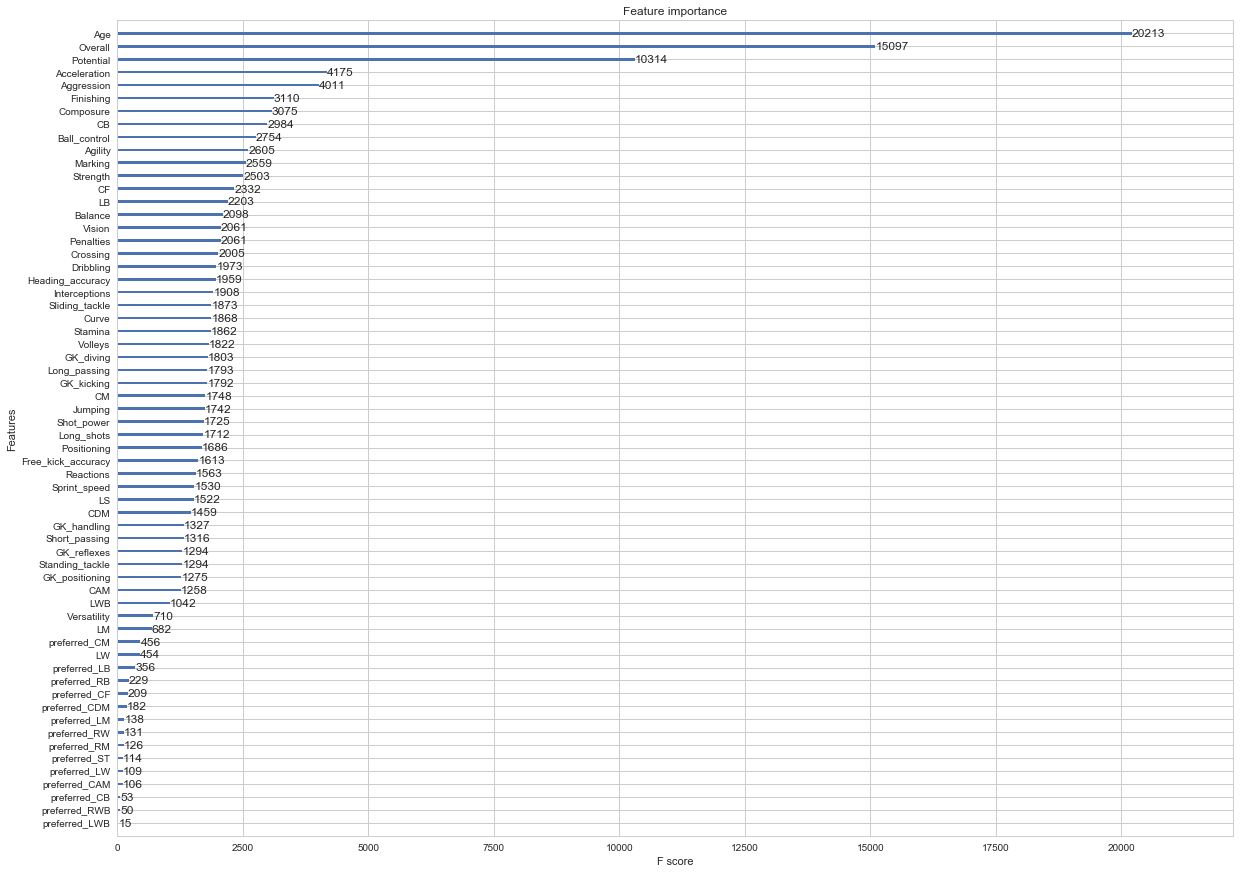

In [40]:
#Feature Importance
plt.figure(figsize=(20,15))
xgb.plot_importance(model_value, ax=plt.gca())

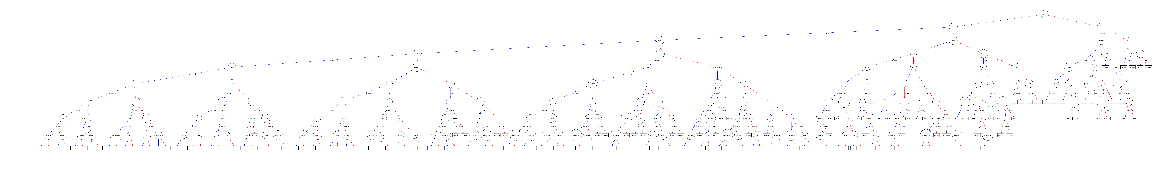

In [41]:
#Tree Diagram
plt.figure(figsize=(20,15))
xgb.plot_tree(model_value, ax=plt.gca())

### Predictions
Now we can look at who are the players our model considers to be overpriced and underpriced.

In [42]:
#Predict the value based on the model.
dpred_value = xgb.DMatrix(preprocessed_df, label = y_value)
y_pred = pd.Series(model_value.predict(dpred_value))

In [43]:
#Top 10% players with overpriced transfer values.
sub_value = y_value.subtract(y_pred)
exp_value = processed_df.loc[sub_value.nlargest(int(len(sub_value)/1000)).index]
exp_value

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
183,183,M. Dembélé,29,Belgium,83,83,Tottenham Hotspur,25000000.0,115000.0,75.0,...,76.0,78.0,81.0,80.0,79.0,79.0,77.0,78.0,77.0,77.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
9,9,G. Higuaín,29,Argentina,90,90,Juventus,77000000.0,275000.0,78.0,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0
170,170,M. Mandžukić,31,Croatia,83,83,Juventus,23500000.0,135000.0,68.0,...,72.0,73.0,75.0,72.0,78.0,77.0,81.0,76.0,72.0,81.0
204,204,J. Seri,25,Ivory Coast,82,83,OGC Nice,26000000.0,45000.0,84.0,...,76.0,73.0,81.0,78.0,79.0,80.0,75.0,79.0,77.0,75.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
127,127,K. Mbappé,18,France,83,94,Paris Saint-Germain,41500000.0,31000.0,89.0,...,64.0,58.0,75.0,64.0,82.0,81.0,82.0,82.0,67.0,82.0
69,69,Y. Carrasco,23,Belgium,85,90,Atlético Madrid,51500000.0,77000.0,87.0,...,56.0,45.0,74.0,56.0,83.0,83.0,79.0,84.0,60.0,79.0
737,737,Bruno Peres,27,Brazil,78,78,Roma,11000000.0,62000.0,89.0,...,79.0,73.0,74.0,75.0,75.0,77.0,72.0,76.0,79.0,72.0


In [44]:
#Top 10% players with underpriced transfer values.
cheap_value = sub_value.nsmallest(int(len(sub_value)/1000))
cheap_value = processed_df.loc[cheap_value.index]
cheap_value

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
472,472,M. Berg,30,Sweden,80,80,NaN,0.0,0.0,74.0,...,50.0,47.0,66.0,51.0,76.0,71.0,78.0,73.0,53.0,78.0
1402,1402,P. Tau,23,South Africa,76,78,NaN,0.0,0.0,79.0,...,52.0,41.0,67.0,51.0,75.0,74.0,71.0,76.0,56.0,71.0
944,944,B. Dočkal,28,Czech Republic,77,77,NaN,0.0,0.0,68.0,...,61.0,55.0,74.0,63.0,75.0,75.0,71.0,75.0,64.0,71.0
37,37,A. Vidal,30,Chile,87,87,FC Bayern Munich,37500000.0,160000.0,76.0,...,83.0,84.0,83.0,85.0,81.0,80.0,81.0,80.0,83.0,81.0
1888,1888,C. Rodríguez,31,Uruguay,75,75,NaN,0.0,0.0,70.0,...,64.0,62.0,72.0,66.0,74.0,74.0,72.0,73.0,67.0,72.0
48,48,Isco,25,Spain,86,90,Real Madrid CF,56500000.0,250000.0,74.0,...,67.0,61.0,84.0,71.0,84.0,82.0,79.0,83.0,70.0,79.0
1899,1899,C. Toselli,29,Chile,75,75,NaN,0.0,0.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2912,2912,J. Góralski,24,Poland,73,77,NaN,0.0,0.0,70.0,...,70.0,70.0,68.0,72.0,61.0,65.0,58.0,62.0,70.0,58.0
197,197,Casillas,36,Spain,83,83,FC Porto,3500000.0,10000.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3938,3938,M. Siopis,23,Greece,72,77,NaN,0.0,0.0,72.0,...,71.0,70.0,66.0,71.0,62.0,64.0,59.0,63.0,71.0,59.0


In [45]:
model_value.save_model("model_value.model")

## Wage

In [46]:
dtrain_wage = xgb.DMatrix(X_train_wage, label=y_train_wage)
dtest_wage = xgb.DMatrix(X_test_wage, label=y_test_wage)
evaluation_set_wage = [(dtest_wage, "Test_set")]

### Create Baseline Model for Comparison (Average)

In [47]:
mean_train_wage = np.mean(y_train_wage)

# Get predictions on the test set
baseline_predictions_wage = np.ones(y_test_wage.shape) * mean_train_wage

# Compute MAE
mae_baseline_wage = mean_absolute_error(y_test_wage, baseline_predictions_wage)

# Compute RMSE
rmse_baseline_wage = sqrt(mean_squared_error(y_test_wage, baseline_predictions_wage))

print("Baseline MAE is {:.2f}".format(mae_baseline_wage))
print("Baseline RMSE is {:.2f}".format(rmse_baseline_wage))

Baseline MAE is 12179.33
Baseline RMSE is 23305.31


### Grid Search for Best Parameters

In [48]:
best_score_wage = mae_baseline_wage
best_params_wage = {}
for i, grid_search_wage in enumerate(params_perms):
    print("Permutation number:", i+1)
    cv_results_wage = xgb.cv(grid_search_wage,
                        dtrain_wage,
                        num_boost_round=num_boost_round,
                        seed=42,
                        nfold=2,
                        metrics={'mae'},
                        early_stopping_rounds=early_stopping_rounds
                        )
    
    mean_mae_wage = cv_results_wage['test-mae-mean'].min()
    boost_rounds_wage = cv_results_wage['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae_wage, boost_rounds_wage))
    if mean_mae_wage < best_score_wage:
        best_score_wage = mean_mae_wage
        best_params_wage = grid_search_wage

Permutation number: 1


/Users/paulfournier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning:

'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.



	MAE 5419.3625489999995 for 217 rounds
Permutation number: 2
	MAE 5416.1091305 for 231 rounds
Permutation number: 3
	MAE 5409.887207 for 216 rounds
Permutation number: 4
	MAE 5412.4812010000005 for 231 rounds
Permutation number: 5
	MAE 5439.145508 for 211 rounds
Permutation number: 6
	MAE 5448.504882499999 for 226 rounds
Permutation number: 7
	MAE 5461.8757325 for 204 rounds
Permutation number: 8
	MAE 5491.635498 for 223 rounds
Permutation number: 9
	MAE 5419.3625489999995 for 217 rounds
Permutation number: 10
	MAE 5416.1091305 for 231 rounds
Permutation number: 11
	MAE 5409.887207 for 216 rounds
Permutation number: 12
	MAE 5412.4812010000005 for 231 rounds
Permutation number: 13
	MAE 5439.145508 for 211 rounds
Permutation number: 14
	MAE 5448.504882499999 for 226 rounds
Permutation number: 15
	MAE 5461.8757325 for 204 rounds
Permutation number: 16
	MAE 5491.635498 for 223 rounds
Permutation number: 17
	MAE 5451.830078 for 21 rounds
Permutation number: 18
	MAE 5505.382079999999 for 21 

### Retrain the Model with the Best Parameters

In [49]:
#Retrain a model with new best params
model_wage = xgb.train(
    best_params_wage,
    dtrain_wage,
    num_boost_round=num_boost_round,
    evals=evaluation_set_wage,
    early_stopping_rounds=early_stopping_rounds
)

[0]	Test_set-rmse:25933	Test_set-mae:11730.5
Multiple eval metrics have been passed: 'Test_set-mae' will be used for early stopping.

Will train until Test_set-mae hasn't improved in 10 rounds.
[1]	Test_set-rmse:25733.4	Test_set-mae:11622
[2]	Test_set-rmse:25547.1	Test_set-mae:11517.4
[3]	Test_set-rmse:25343.7	Test_set-mae:11412.4
[4]	Test_set-rmse:25144.9	Test_set-mae:11308.4
[5]	Test_set-rmse:24946.9	Test_set-mae:11206.3
[6]	Test_set-rmse:24762.2	Test_set-mae:11106.4
[7]	Test_set-rmse:24569.5	Test_set-mae:11005.8
[8]	Test_set-rmse:24388.5	Test_set-mae:10908.1
[9]	Test_set-rmse:24208.2	Test_set-mae:10811.9
[10]	Test_set-rmse:24019.8	Test_set-mae:10715.1
[11]	Test_set-rmse:23839.1	Test_set-mae:10620.9
[12]	Test_set-rmse:23656.3	Test_set-mae:10527
[13]	Test_set-rmse:23471.1	Test_set-mae:10433.3
[14]	Test_set-rmse:23292.7	Test_set-mae:10341.9
[15]	Test_set-rmse:23137	Test_set-mae:10252.9
[16]	Test_set-rmse:22961.3	Test_set-mae:10163.3
[17]	Test_set-rmse:22791.2	Test_set-mae:10075.2
[18]	

[168]	Test_set-rmse:12372	Test_set-mae:5639.84
[169]	Test_set-rmse:12352.7	Test_set-mae:5636.31
[170]	Test_set-rmse:12337.6	Test_set-mae:5633.12
[171]	Test_set-rmse:12321.1	Test_set-mae:5630.73
[172]	Test_set-rmse:12304.7	Test_set-mae:5627.45
[173]	Test_set-rmse:12287.1	Test_set-mae:5623.07
[174]	Test_set-rmse:12274.9	Test_set-mae:5620.84
[175]	Test_set-rmse:12261.5	Test_set-mae:5617.59
[176]	Test_set-rmse:12248.9	Test_set-mae:5614.54
[177]	Test_set-rmse:12233.4	Test_set-mae:5610.9
[178]	Test_set-rmse:12218.6	Test_set-mae:5607.48
[179]	Test_set-rmse:12203.2	Test_set-mae:5603.88
[180]	Test_set-rmse:12188.5	Test_set-mae:5600.82
[181]	Test_set-rmse:12174.2	Test_set-mae:5597.83
[182]	Test_set-rmse:12158.2	Test_set-mae:5594.07
[183]	Test_set-rmse:12144.5	Test_set-mae:5591.34
[184]	Test_set-rmse:12131.4	Test_set-mae:5588.23
[185]	Test_set-rmse:12118.1	Test_set-mae:5585.62
[186]	Test_set-rmse:12104.5	Test_set-mae:5582.69
[187]	Test_set-rmse:12092.4	Test_set-mae:5580.02
[188]	Test_set-rmse:120

### Evaluate the Model

In [50]:
print("Average guess error", mae_baseline_wage)
print("vs Mean Absolute Error", mean_absolute_error(model_wage.predict(dtest_wage), y_test_wage))

Average guess error 12179.333124439692
vs Mean Absolute Error 5522.085072012322


### Model Summary

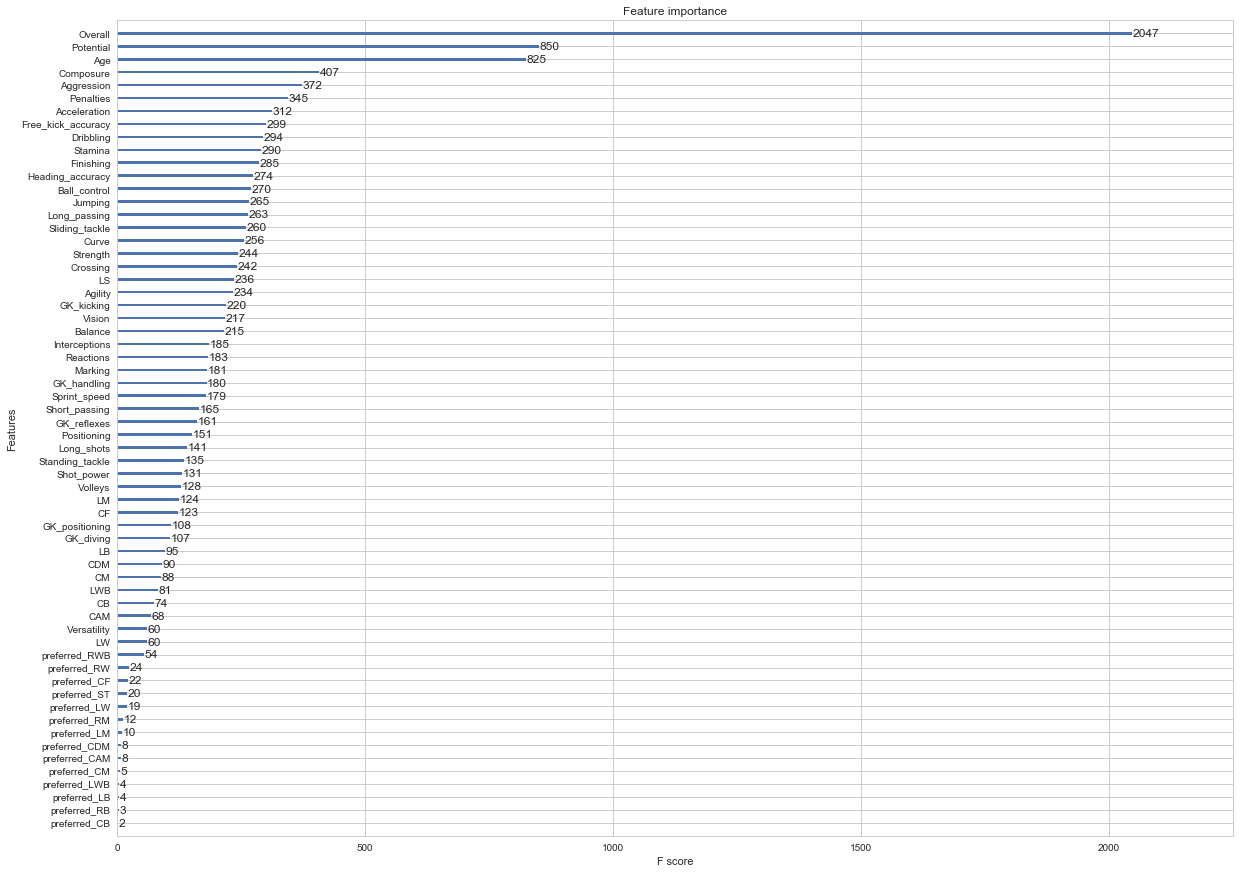

In [51]:
#Feature Importance
plt.figure(figsize=(20,15))
xgb.plot_importance(model_wage, ax=plt.gca())

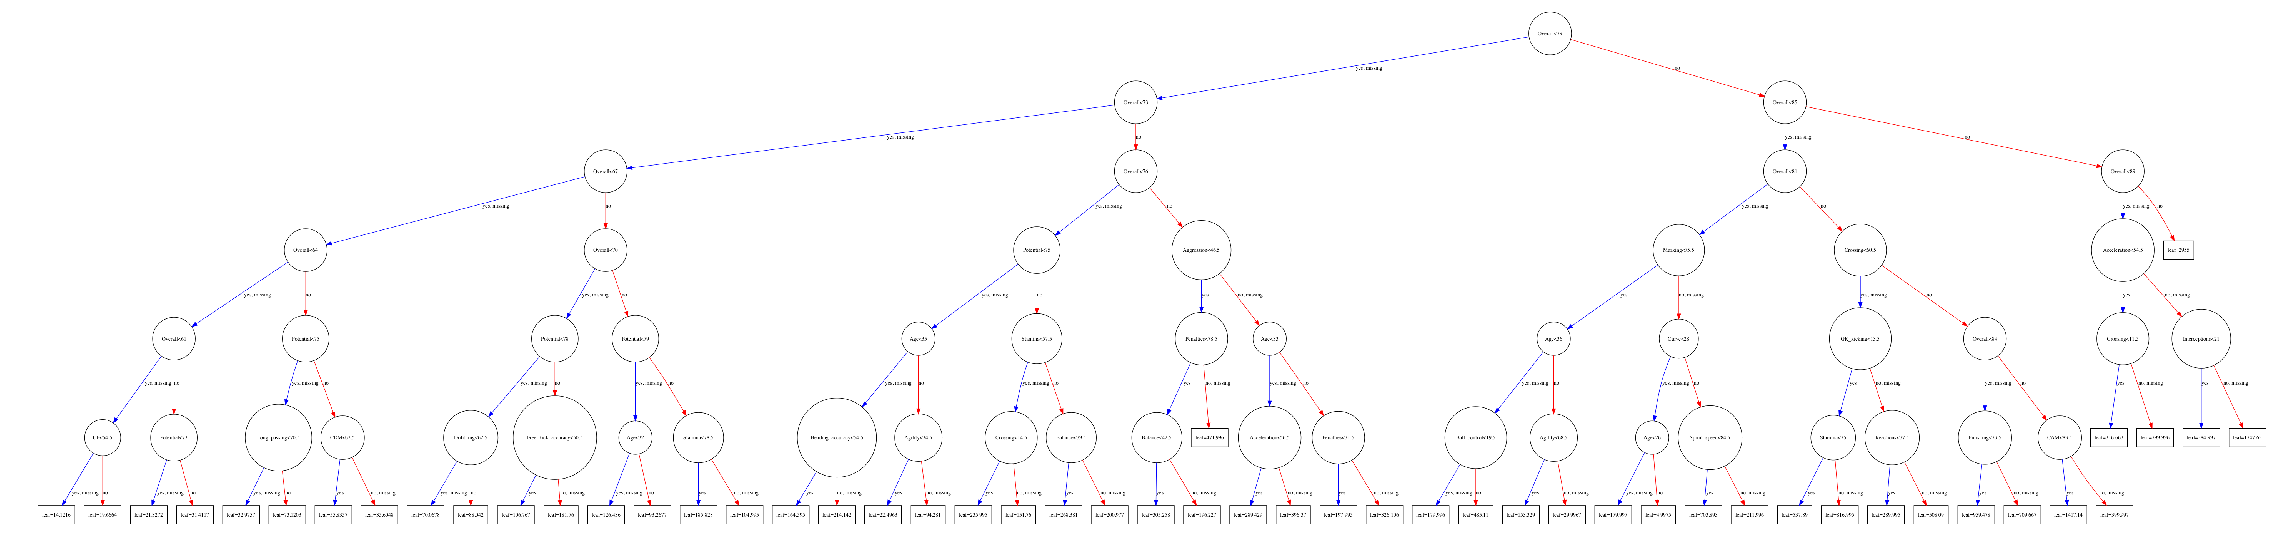

In [57]:
#Tree Diagram
plt.figure(figsize=(40,15))
xgb.plot_tree(model_wage, ax=plt.gca())

### Predictions

In [53]:
#Predict the value based on the model.
dpred_wage = xgb.DMatrix(preprocessed_df, label = y_wage)
y_pred_wage = pd.Series(model_wage.predict(dpred_wage))

In [54]:
#Top 10% players with overpriced wages.
sub_wage = y_value.subtract(y_pred_wage)
exp_wage = processed_df.loc[sub_wage.nlargest(int(len(sub_wage)/1000)).index]
exp_wage

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,94.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,92.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,88.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,89.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
5,5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,79.0,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
7,7,E. Hazard,26,Belgium,90,91,Chelsea,90500000.0,295000.0,93.0,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
11,11,K. De Bruyne,26,Belgium,89,92,Manchester City,83000000.0,285000.0,76.0,...,66.0,57.0,84.0,70.0,85.0,85.0,81.0,85.0,71.0,81.0
19,19,P. Dybala,23,Argentina,88,93,Juventus,79000000.0,215000.0,88.0,...,55.0,43.0,78.0,55.0,86.0,86.0,83.0,87.0,60.0,83.0
8,8,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000.0,340000.0,60.0,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,Argentina,90,90,Juventus,77000000.0,275000.0,78.0,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [55]:
#Top 10% players with underpriced transfer values.
cheap_wage = sub_wage.nsmallest(int(len(sub_wage)/1000))
cheap_wage = processed_df.loc[cheap_wage.index]
cheap_wage

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
274,274,A. Witsel,28,Belgium,82,82,NaN,0.0,0.0,67.0,...,76.0,76.0,80.0,79.0,78.0,78.0,77.0,78.0,77.0,77.0
167,167,Adrien Silva,28,Portugal,83,83,NaN,0.0,0.0,64.0,...,78.0,75.0,82.0,81.0,78.0,79.0,74.0,78.0,79.0,74.0
472,472,M. Berg,30,Sweden,80,80,NaN,0.0,0.0,74.0,...,50.0,47.0,66.0,51.0,76.0,71.0,78.0,73.0,53.0,78.0
658,658,Gervinho,30,Ivory Coast,79,79,NaN,0.0,0.0,91.0,...,55.0,43.0,71.0,54.0,77.0,79.0,74.0,78.0,59.0,74.0
925,925,B. Moukandjo,28,Cameroon,77,77,NaN,0.0,0.0,90.0,...,53.0,44.0,66.0,51.0,76.0,76.0,76.0,77.0,56.0,76.0
162,162,Oscar,25,Brazil,83,86,NaN,0.0,0.0,75.0,...,61.0,49.0,77.0,61.0,80.0,79.0,74.0,79.0,64.0,74.0
1019,1019,Gil,30,Brazil,77,77,NaN,0.0,0.0,53.0,...,70.0,76.0,65.0,74.0,57.0,58.0,57.0,55.0,68.0,57.0
488,488,Renato Augusto,29,Brazil,80,80,NaN,0.0,0.0,66.0,...,71.0,68.0,79.0,74.0,78.0,78.0,74.0,78.0,73.0,74.0
944,944,B. Dočkal,28,Czech Republic,77,77,NaN,0.0,0.0,68.0,...,61.0,55.0,74.0,63.0,75.0,75.0,71.0,75.0,64.0,71.0
1819,1819,M. Martins,30,Bolivia,75,75,NaN,0.0,0.0,64.0,...,47.0,46.0,63.0,50.0,71.0,68.0,74.0,69.0,50.0,74.0


The players with the most disproportionate wages are the best players in the world which goes to show that it is an important factor for clubs to consider when trying to attract players to their clubs. </b>
The "underpriced players" are good players that are not under contract. So team hop teams on these good deals.

In [56]:
model_wage.save_model("model_wage.model")